# Project 1 - Classification
## CS (STAT) 5525 Due - April 1, 2021
## Instructions and Experiments

Note: Please read the entire project description before you begin. The goal of this project is to analyze the performance of classification algorithms on several synthetic and real-world data sets. This will be done in the following steps:
- First, you will explore the data sets.
- Next, you will perform a series of experiments on which you will be asked to answer
a series of questions. For these experiments, you will be running a Python Jupyter notebook.
- Third, you will compile your answers in the form of a report.

## Python Jupyter Notebooks
We recommend installing Jupyter using Anaconda as it will also install other regularly used packages for scientific computing and data science. Some pointers to setup Jupyter notebooks on your system:
- Video link - https://www.youtube.com/watch?v=MvN7Wdh0Juk
- Medium Link - https://medium.com/@neuralnets/beginners-quick-guide-for-handling-
issues-launching-jupyter-notebook-for-python-using-anaconda-8be3d57a209b
- Tutorials link - https://www.dataquest.io/blog/jupyter-notebook-tutorial/,
https://www.youtube.com/watch?v=3C9E2yPBw7s
1

## Before you Begin
- Visually explore the data sets in the experiments below, and consider the following:
    - Types of attributes 
    - Class distribution
    - Which attributes appear to be good predictors, if any
    - Possible correlation between attributes
    - Any special structure that you might observe - Note: The discussion of this exploration is not required in the report, but this step will help you get ready to answer the questions that follow
- Use precision and recall as evaluation metrics to report classification performance.
- Your goal is to learn everything that you can about the dataset. Answer the questions
below as a starting point, but you should dig further. What more can you discover? The goal of this assignment is to give a helping hand for you to discover the most interesting and surprising things.
Report and Submission
- Write a report addressing the experiment questions. Your project will be evaluated based only on what you write on the report. Submit the report as a PDF file on Canvas.
- Collect output from all your experiments and submit your Jupyter notebooks (cells displaying output) electronically as a separate zipped file on Canvas. We will look at your outputs if something is ambiguous in your report. Copy and paste the output from the Jupyter notebook into your report only to the limited extent needed to support your answers.

In [42]:
import pandas as pd
import numpy as np

In [ ]:
#TODO
# Prob1: #8 - one issue with probabilities
# Prob2: #3-#8
# Prob3: ALL

## 1 Problem 1 [37 points]
The files for this problem are under the Experiment 1 folder. Datasets to be used for experimentation: telecom churn.csv. Jupyter notebook to use as a starting point: Exploratory data analysis.ipynb. In this experiment, we will do exploratory data analysis to get a better sense of data. The dataset contains record of telecom customer along with the label "churn". Churn = "true" signifies that the customer has left the company and churn = "false" signifies that the customer is still loyal to the company. Answer the following questions
1. How many records are there in the dataset?

In [43]:
df_churn = pd.read_csv("Experiment - 1/telecom_churn.csv")

In [44]:
print("The number of records in 'telecom_churn.csv' is {}".format(len(df_churn)))

The number of records in 'telecom_churn.csv' is 3333


2. How many input features are there for classification? Name each feature and assign it as categorical, count, or continuous.

In [45]:
headers = df_churn.columns
print("Dataset input features: \n{}".format(headers))

Dataset input features: 
Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


3. For the continuous features, what is the average, median, maximum, minimum, and standard deviation values? Note that the 50 percentile value is same as the median.

In [46]:
# TODO - NOT COMPLETE - CONFIRM THAT THIS IS NEEDED

df_churn['total day minutes'].mean()
df_churn['total day minutes'].median()
df_churn['total day minutes'].max()
#df_churn['total day minutes'].

#...

350.8

In [47]:
listOfContVariables = ['number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 
                       'total eve minutes', 'total eve calls', 'total eve charge',
                      'total night minutes', 'total night calls', 'total night charge',
                      'total intl minutes', 'total intl calls', 'total intl charge',
                      'customer service calls']
df_churn[listOfContVariables].describe()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


4. What is the average number of customer service calls made by a customer to the company?

In [48]:
avgCustomerCalls = df_churn['customer service calls'].mean()
print("The average number of customer service calls made by an account is {}".format(avgCustomerCalls))

The average number of customer service calls made by an account is 1.5628562856285628


5. What is the distribution of the class variable, "churn"? Calculate the probability of P(churn = True) and P(churn = False).

In [78]:
# Probability of churn equaling True and False
probChurn_True = len(df_churn[df_churn['churn']])/len(df_churn)
probChurn_False = 1 - probChurn_True
print("Probability of Churn\n\tTrue: {:.2f}\n\tFalse: {:.2f}".format(probChurn_True, probChurn_False))

Probability of Churn
	True: 0.14
	False: 0.86


6. What is the distribution of the feature, "international plan"? Calculate the probability of P(international plan = 'yes') and P(international plan = 'no').

In [60]:
# Replace all instances of 'yes' and 'no' with True or False to use boolean expressions.
df_churn['international plan'] = df_churn['international plan'].replace('yes', True)
df_churn['international plan'] = df_churn['international plan'].replace('no', False)


In [84]:
probIntl_True = len(df_churn[df_churn['international plan']])/len(df_churn)
probIntl_False = 1 - probIntl_True
print("Probability of International Plans\n\tTrue: {:.2f}\n\tFalse: {:.2f}".format(probIntl_True, probIntl_False))

Probability of International Plans
	True: 0.10
	False: 0.90


7. Assume you have devised a classification model that states that if "international plan" = 'no', then the customer will not churn (i.e., churn = False). Report the accuracy of this classification model on the given dataset.

In [52]:
# Option 1 of 2 - Long form of equality.
#numNoInterNoChurn = len(df_churn[df_churn['international plan'] == False & (df_churn['churn'] == False)])

In [53]:
# Option 2 of 2 - Short form of equality.
numNoInterNoChurn = len(df_churn[~df_churn['international plan'] & ~df_churn['churn']])

In [88]:
accuracy = numNoInterNoChurn / len(df_churn)
print("Accuracy of classification of 'If NO international plan then NO churn': {:.2f}".format(accuracy))

Accuracy of classification of 'If NO international plan then NO churn': 0.80


8. Calculate the following conditional probabilities:
- P(churn = True | international plan = `yes')
- P(churn = False | international plan = `yes')
- P(churn= True | international plan = `no')
- P(churn = False | international plan = `no')
Based on the probabilities computed above and those computed in parts 5 and 6, answer the following question using the Bayes theorem: "Given that a customer has churned (churn = True), what are the probabilities that the customer has opted/not-opted for the international plan? Similarly, given that the customer has not churned (churn = False), what are the probabilities that the customer has opted/not-opted for the international plan?"

In [89]:
# Bayes Theorum = P(B | A) = P(A|B)P(A)/P(B) = Probability of B given that A occurred 


In [90]:
# P(churn = True | international plan = `yes')
YesInterYesChurn = len(df_churn[df_churn['international plan'] & df_churn['churn']])
YesInter = len(df_churn[df_churn['international plan']])
pYesInterYesChurn = YesInterYesChurn / YesInter
print("Probability of customer Churn if they have an International Plan")
print("\tP(churn = True | international plan = `yes') = {:.2f}".format(pYesInterYesChurn))

Probability of customer Churn if they have an International Plan
	P(churn = True | international plan = `yes') = 0.42


In [91]:
# P(churn = False | international plan = `yes')
YesInterNoChurn = len(df_churn[df_churn['international plan'] & ~df_churn['churn']])
YesInter = len(df_churn[df_churn['international plan']])
pYesInterNoChurn = YesInterNoChurn / YesInter
print("Probability of customer Churn if they have an International Plan")
print("\tP(churn = False | international plan = `yes') = {:.2f}".format(pYesInterNoChurn))

Probability of customer Churn if they have an International Plan
	P(churn = False | international plan = `yes') = 0.58


In [92]:
# Sanity check
if(pYesInterYesChurn + pYesInterNoChurn != 1):
    print("ERROR: Probabilities do no equal one.")

In [93]:
# P(churn = True | international plan = `no')
NoInterYesChurn = len(df_churn[~df_churn['international plan'] & df_churn['churn']])
NoInter = len(df_churn[~df_churn['international plan']])
pNoInterYesChurn = NoInterYesChurn / NoInter
print("Probability of customer Churn if they have an International Plan")
print("\tP(churn = True | international plan = `no') = {:.2f}".format(pNoInterYesChurn))

Probability of customer Churn if they have an International Plan
	P(churn = True | international plan = `no') = 0.11


In [94]:
# P(churn = False | international plan = `no')
NoInterNoChurn = len(df_churn[~df_churn['international plan'] & ~df_churn['churn']])
NoInter = len(df_churn[~df_churn['international plan']])
pNoInterNoChurn = NoInterNoChurn / NoInter
print("Probability of customer Churn if they have an International Plan")
print("\tP(churn = False | international plan = `no') = {:.2f}".format(pNoInterNoChurn))

Probability of customer Churn if they have an International Plan
	P(churn = False | international plan = `no') = 0.89


In [95]:
# Based on the probabilities computed above and those computed in parts 5 and 6, answer the following question using 
#  the Bayes theorem:  "Given that a customer has churned (churn = True), what are the probabilities that the 
#                        customer has opted/not-opted for the international plan?
#                        AKA: P(Internation Plan = True | Chrun = True) and P(Internation Plan = False | Chrun = True)


# Using Bayes Theorem: P(B | A) = P(A|B)P(A)/P(B) 
pYesChurnYesInter = pYesInterYesChurn * probChurn_True / probIntl_True
print("\tP(Internation Plan = True | Chrun = True) = {:.2f}".format(pYesChurnYesInter))

pYesChurnNoInter = pNoInterYesChurn * probChurn_True / probIntl_False
print("\tP(Internation Plan = False | Chrun = True) = {:.2f}".format(pYesChurnNoInter))

	P(Internation Plan = True | Chrun = True) = 0.63
	P(Internation Plan = False | Chrun = True) = 0.02


In [96]:
# Similarly, given that the customer has not churned (churn = False), what are the probabilities that the 
#  customer has opted/not-opted for the international plan?"
#  AKA: P(Internation Plan = True | Chrun = False) and P(Internation Plan = False | Chrun = False)

# Using Bayes Theorem: P(B | A) = P(A|B)P(A)/P(B) 
pNoChurnYesInter = pYesInterNoChurn * probChurn_False / probIntl_True
print("\tP(Internation Plan = True | Chrun = False) = {:.2f}".format(pNoChurnYesInter))

pNoChurnNoInter = pNoInterNoChurn * probChurn_False / probIntl_False
print("\tP(Internation Plan = False | Chrun = False) = {:.2f}".format(pNoChurnNoInter))

	P(Internation Plan = True | Chrun = False) = 5.08
	P(Internation Plan = False | Chrun = False) = 0.84


In [104]:
#^^^^^^
# ISSUE WITH ABOVE
pYesInterNoChurn

0.5758513931888545

In [105]:
probChurn_False

0.8550855085508551

In [106]:
probIntl_True

0.0969096909690969

9. Assume you have devised a classification model which states that if "international plan" = "yes" and the number of calls to the service center is greater than 3, then the customer will churn (i.e., "churn" = True). Report the accuracy of this classification model on the given dataset.

In [103]:
# Logic: if(internationPlan && #Calls > 3) then churn will equal True

numChurnIfBadService = len(df_churn[df_churn['international plan'] & df_churn['customer service calls'] > 3 & df_churn['churn']])

pChurnIfBadService = numChurnIfBadService / len(df_churn)
print("P(Chrun = True | (InternationalPlan && CustomerServiceCalls > 3)) = {:.2f}".format(pChurnIfBadService))

P(Chrun = True | (InternationalPlan && CustomerServiceCalls > 3)) = 0.03


## 2 Problem 2 [23 points]
The files for this problem are under the Experiment 2 folder. Datasets to be used for experimentation: telecom churn.csv. Jupyter notebook to be used as a starting point: Decision Trees and kNN.ipynb. In this experiment we will apply and visualize decision trees and kNN, finetune their hyper-parameters and learn about k-fold cross validation. To visualize decision tree we need additional packages to be installed i.e., Graphviz and pydotplus (check the Anaconda.org page for instructions on how to install them using conda). Answer the following questions:

In [1]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\johns\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.functools_lru_cache-1.6.4|     pyhd3eb1b0_0           9 KB
    backports.tempfile-1.0     |     pyhd3eb1b0_1          11 KB
    conda-4.13.0               |   py38haa95532_0         926 KB
    conda-package-handling-1.8.1|   py38h8cc25b3_0         729 KB
    xmltodict-0.12.0           |     pyhd3eb1b0_0          13 KB
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following packages will be REMOVED:

  python_abi-3.8-2_cp38

The following packages will be UPDATED:

  backports.functoo~                             1.6.1-py_0 --> 1.6.4-pyhd3eb1b0_0
  conda-package-han~                   1.7.2-py38h7

In [2]:
conda install -yc conda-forge pydotplus graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\johns\anaconda3

  added / updated specs:
    - graphviz
    - pydotplus


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.13.0-py38haa95532_0 --> conda-forge::conda-4.13.0-py38haa244fe_1


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


1. Consider training decision trees for the synthetic dataset involving two classes. How does the decision boundary look like when we overfit ( max depth  4 ) and underfit (max depth = 1) the decision tree on the given data? For both cases, paste the decision tree and the decision boundary from Jupyter notebook output.

In [110]:
# Define imports as needed
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [133]:
# Load telee_churn.csv data
#df = pd.read_csv('Experiment - 2/telecom_churn.csv')

# Create random numbers for a feature that classifies a binary target.
import random
nSamples = 100
feature = np.array(np.random.randint(low=0, high=100, size=nSamples))
target = np.array(np.random.randint(low=0, high=2, size=nSamples))

In [140]:
# Sitatuion 1 - Descision Boundry with overfit model (max Depth = 4)
# Define DT
clf_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=23)

# Train the DT based on loaded data
clf_tree.fit(feature.reshape(-1, 1), target.reshape(-1, 1))


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=23)

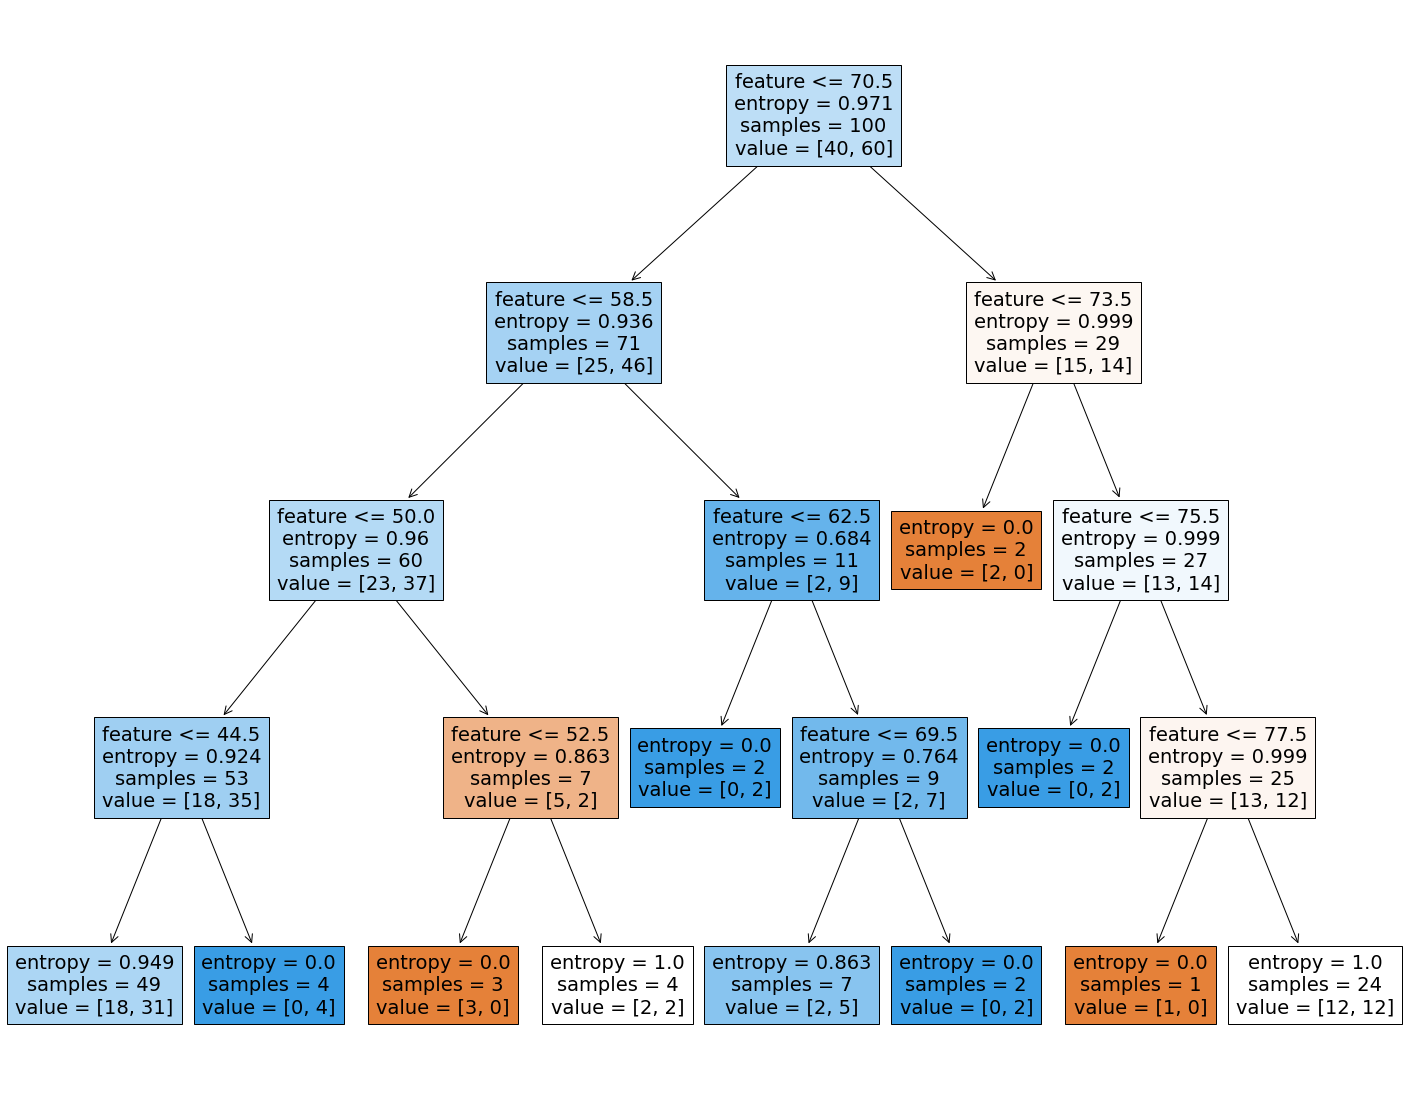

In [153]:
# Display tree
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
graph = plot_tree(clf_tree, feature_names=['feature'], filled=True)

In [ ]:
# use if you wish to save the tree to an external path
#from sklearn.tree import export_graphviz
#tree_str = export_graphviz(clf_tree, feature_names=['feature'], 
                                     filled=True, out_file=None)
#graph = pydotplus.graph_from_dot_data(tree_str)  
#graph.write_png(png_file_to_save)

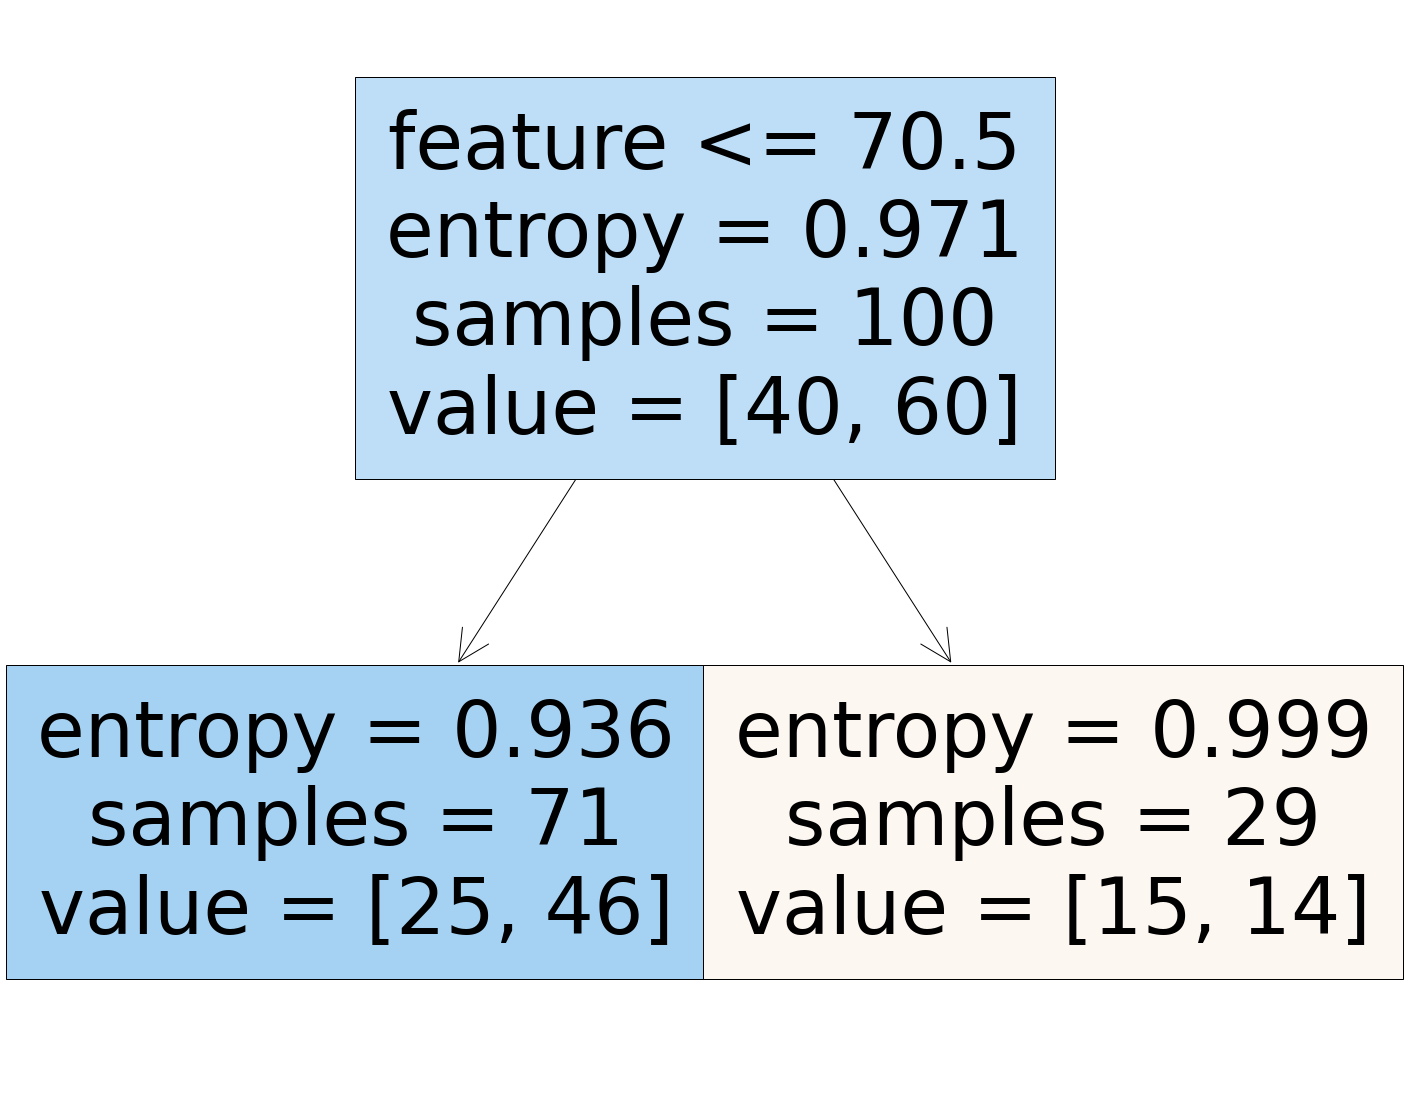

In [154]:
# Sitatuion 2 - Descision Boundry with underfit model (max Depth = 1)
# Define DT
clf_tree = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=23)

# Train the DT based on loaded data
clf_tree.fit(feature.reshape(-1, 1), target.reshape(-1, 1))

# Display tree
fig = plt.figure(figsize=(25,20))
graph = plot_tree(clf_tree, feature_names=['feature'], filled=True)

**Problem 2.1 - Conclusions**

By comparing the two max_depth trees; the biggest observation that there was no one single feature value that could have split this random set into a cleanish leaf. Both leafs in the shallow tree have significant uncertainty on what to classify a value as (leaf1 is split 25-to-46 to classify as a 0 or a 1, and leaf2 is even more indecisive at 15-to-14). Compared to the deeper tree that has some leafs of perfect classification.

2. Decision tree classifier sklearn.tree.DecisionT reeClassif ier has parameter "max depth" which defines the maximum depth of the tree. What happens if we don't specify any value for this parameter? Paste the decision tree and the decision boundary you will obtain for this default case from Jupyter notebook output.

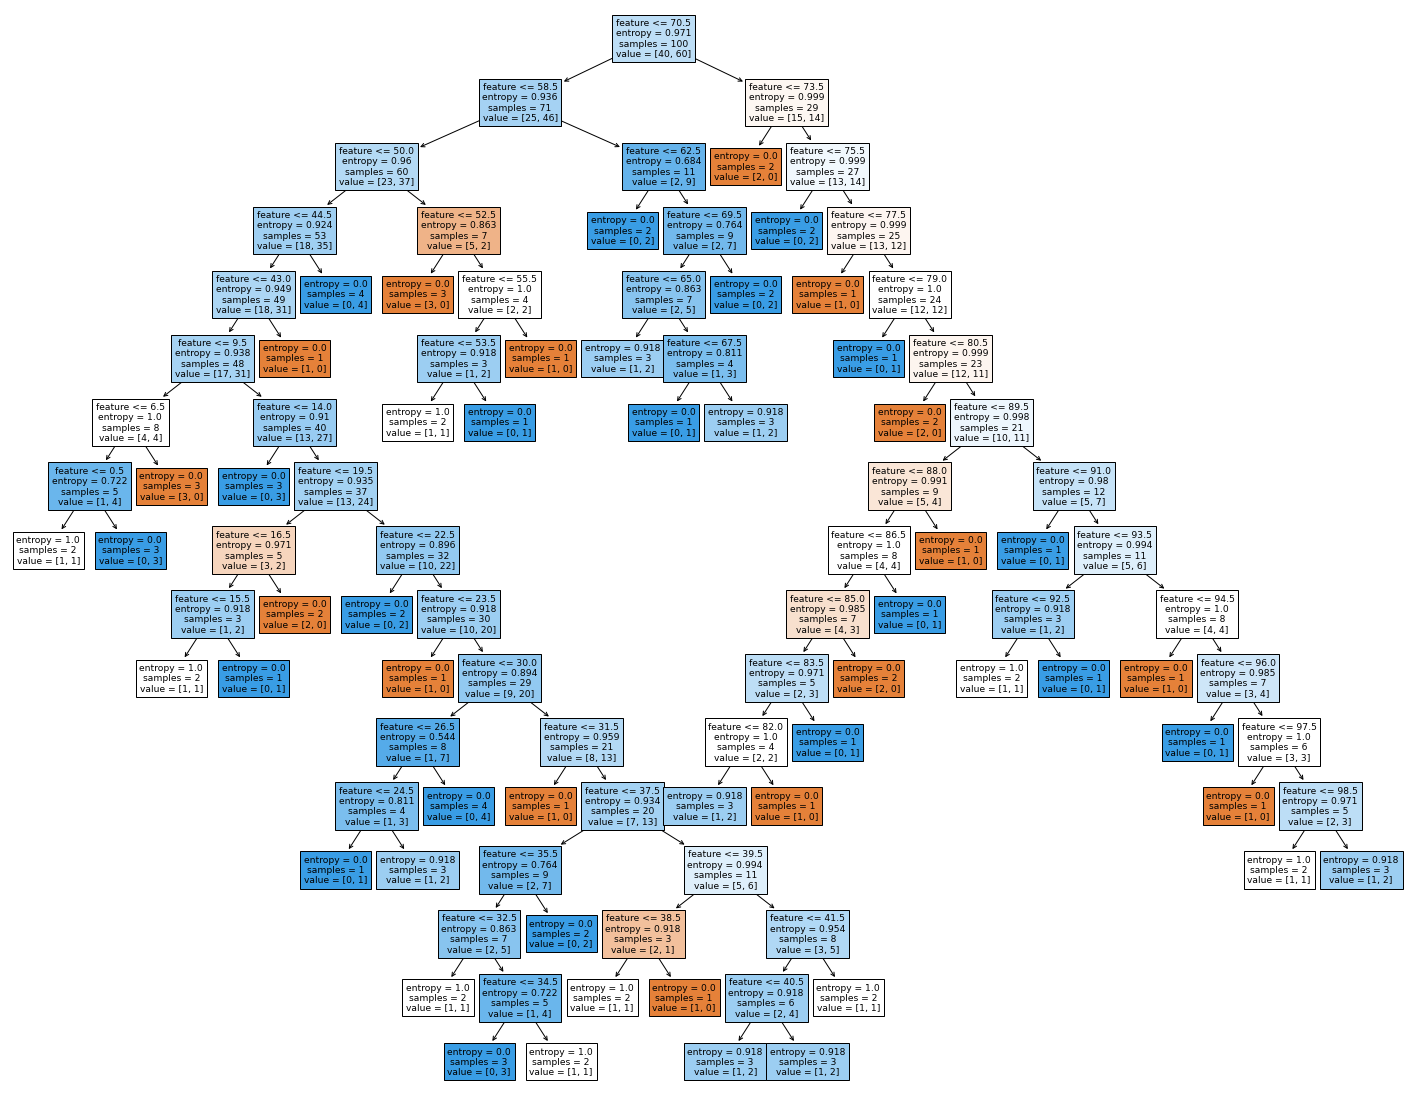

In [155]:
# Sitatuion 23 - Descision Boundry with an undefined max_depth
# Define DT
clf_tree = DecisionTreeClassifier(criterion='entropy', random_state=23)

# Train the DT based on loaded data
clf_tree.fit(feature.reshape(-1, 1), target.reshape(-1, 1))

# Display tree
fig = plt.figure(figsize=(25,20))
graph = plot_tree(clf_tree, feature_names=['feature'], filled=True)

**Problem 2.2 - Conclusions**

When the 'max_depth' class parameter is not defined in the scikit learn decision tree classifer, the random data tree above indicates that the tree's depth is set at the deepest possible to make the purest classifications. The scikit learn datasheet agrees with this statement, stating: "The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples."
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

3. For Bank Dataset, what are the 5 different age values that the decision tree used to construct the splits of the tree? What is the significance of these 5 values?

In [ ]:
# What 'Bank Dataset'?

4. For the customer churn prediction task, we show that the accuracy of the decision tree is 94% when max depth is set to 5. What happens to accuracy when we leave the value of max depth to its default value? Explain the rise/fall of accuracy.

5. Given a dataset d, with n sample and m continuous features, what does Standard Scaler sklearn.preprocessing.StandardScaler do? Given dataset d = [[0, 0], [0, 0], [1, 1], [1, 1]], write down its scaler transformation.

6. How many decision trees do we have to construct if we have to search the two-parameter space, max depth[1-10] and max features[4-18]? If we consider 10-fold cross-validation with the above scenario, how many decision trees do we construct in total?

7. For the customer churn prediction task, what is the best choice of k[1-10] in the k-nearest neighbor algorithm in the 10-fold cross-validation scenario?

8. For MNIST dataset, what was the accuracy of the decision tree [max depth = 5] and K-nearest neighbor [K = 10]? What were the best hyper-parameter values and test accuracy for decision trees when we used GridSearchCV with 5 fold cross-validation?

## 3 Problem 3 [10 points]
The files for this problem are under Experiment 3 folder. Datasets to be used for experimentation: spam.csv. Jupyter notebook to be used as starting point: Naive Bayes Spam.ipynb. The dataset contains 5,574 messages tagged according to ham (legitimate) or spam. In this experiment we will learn about text features, how to convert them in matrix form, and apply the Naive Bayes algorithm. Answer the following questions: 
1. What is the distribution of the "label" class. Is it skewed? 
2. How many unique values of SMS are there in the dataset? What is the SMS that occurred
most frequently and what is its frequency? 
3. What is the maximum and minimum length of SMS present in the dataset? 
4. Plot the histogram of the length of SMS for both labels separately with bin size 5,
i.e. histogram of the length of all ham SMS and histogram of the length of all spam SMS. What can you say about the difference in SMS lengths across the two labels after examining the plots?
5. Using bag of words approach, convert documents = ['Hi, how are you?', 'Win money, win from home. Call now.', 'Hi., Call you now or tomorrow?'] to its document-term matrix. 6. Report accuracy, precision, recall and F1 score for the spam class after applying Naive Bayes algorithm.